### Puntos del 7 al 9 trabajo evaluativo 1 Aprendizaje Automático

Liceth Mosquera

## Librerias necesarias

In [133]:
import numpy as np
import pandas as pd
import itertools as it
import itertools as it
import seaborn as sns
import tsne
from sklearn import model_selection
import matplotlib.patheffects as pe

import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.ensemble import VotingRegressor
from itertools import cycle
from Orange.classification import tree
#from metrics import precision_score
from sklearn.manifold import TSNE
from scipy import interp
from scipy.io import loadmat


from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn import metrics,svm
from sklearn.metrics import precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.metrics import roc_curve, auc,precision_recall_curve, roc_curve, f1_score,classification_report

from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression,LogisticRegressionCV

from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV # Grid Search

from sklearn.multiclass import OneVsRestClassifier

from sklearn.svm import SVC,LinearSVC


from sklearn.tree import DecisionTreeClassifier


In [29]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')
df1 = Data.dropna(axis=0,how='any')
Y = df1['Class']
X = df1.drop('Class', axis = 1)
df1.groupby('Class').size()

Class
-1    1111
 0    2001
 1     963
dtype: int64

## 7.	Visualizar los datos con el embebimiento BH tsne https://lvdmaaten.github.io/tsne/

In [53]:
def plot(x, colors):
  
    palette = np.array(sns.color_palette("husl", 3))  #Choosing color palette  muted

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(-1,2,1):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

Se demora en correr, en lo posible no tocarlo

In [4]:
%time T = tsne.tsne(X = X, perplexity=60)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 4075...
Computing P-values for point 500 of 4075...
Computing P-values for point 1000 of 4075...
Computing P-values for point 1500 of 4075...
Computing P-values for point 2000 of 4075...
Computing P-values for point 2500 of 4075...
Computing P-values for point 3000 of 4075...
Computing P-values for point 3500 of 4075...
Computing P-values for point 4000 of 4075...
Mean value of sigma: 0.727629
Iteration 10: error is 21.744177
Iteration 20: error is 20.085476
Iteration 30: error is 17.596122
Iteration 40: error is 16.828056
Iteration 50: error is 16.544294
Iteration 60: error is 16.316549
Iteration 70: error is 15.930356
Iteration 80: error is 15.839185
Iteration 90: error is 15.873162
Iteration 100: error is 15.903214
Iteration 110: error is 2.333346
Iteration 120: error is 2.019971
Iteration 130: error is 1.812486
Iteration 140: error is 1.672401
Iteration 150: error is 1.569748
Itera

In [54]:
print(T)

[[-53.73606884  -5.27775697]
 [-53.43619828  -4.75307522]
 [-53.44857825  -4.77115961]
 ...
 [-41.15673971  39.50828959]
 [-41.38428927  39.41534239]
 [-42.55669658  38.64310047]]


(<Figure size 576x576 with 1 Axes>,
 [Text(-15.399232830844273, 12.52700126197461, '-1'),
  Text(12.570984721856188, -17.056721147183314, '0'),
  Text(-16.247489759771565, 11.897102474793623, '1')])

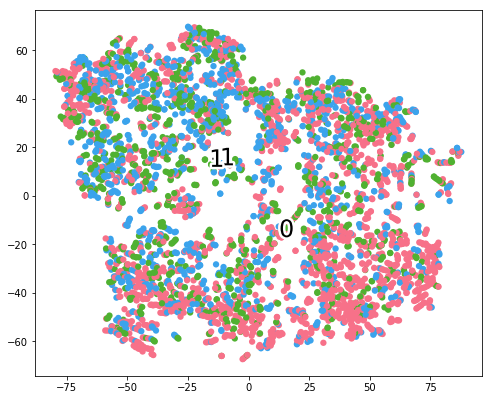

In [134]:
Y_tsne= Y.values
plot(T, Y_tsne)

## 8.	Entrenar el modelo con los datos en altas dimensiones (espacio original)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=109) # 60% training and 40% test

LR: 0.516387 (0.100475)
CART: 0.495050 (0.116576)
SVM: 0.503879 (0.110783)
RFC: 0.510002 (0.105541)


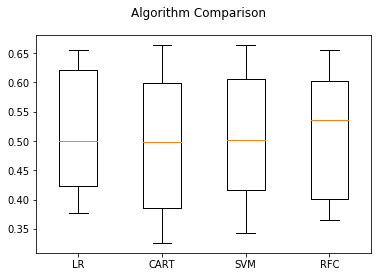

In [51]:
# Compare Algorithms
seed = 3
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial')))
models.append(('CART', DecisionTreeClassifier(max_depth = 3,min_samples_leaf= 6,random_state=seed)))
models.append(('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr')))
models.append(('RFC', RandomForestClassifier(n_estimators=50,max_depth=3,random_state=seed)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 9.	Entrenar el modelo con los datos en dimensiones reducidas

In [85]:
# Binarize the output
y = label_binarize(Y_tsne, classes=[-1, 0, 1])
n_classes = y.shape[1]
n_classes

3

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=109) # g0% training and 40% test

### Modelo SMV con dimensiones reducidas

Accuracy: 0.33312883435582824
F1 score: 0.2420989511142568
Recall: 0.23666070272109588
Precision: 0.3562717770034843

 clasification report:
               precision    recall  f1-score   support

           0       0.43      0.04      0.07       466
           1       0.64      0.67      0.66       782
           2       0.00      0.00      0.00       382

   micro avg       0.63      0.33      0.44      1630
   macro avg       0.36      0.24      0.24      1630
weighted avg       0.43      0.33      0.33      1630
 samples avg       0.33      0.33      0.33      1630



C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


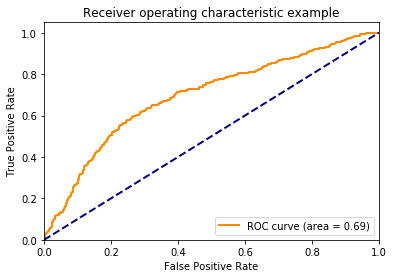

In [87]:
clf = OneVsRestClassifier(svm.SVC(kernel='rbf',gamma='scale', probability=True))
y_score = clf.fit(X_train, y_train).decision_function(X_test)
y_pred = clf.predict(X_test)
Y_proba = clf.predict_proba(X_test)
score=clf.score(X_test, y_pred)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('F1 score:', f1_score(y_test, y_pred, average='macro'))
print ('Recall:', recall_score(y_test, y_pred, average='macro'))
print ('Precision:', precision_score(y_test, y_pred, average='macro'))
print ('\n clasification report:\n', classification_report(y_test,y_pred))


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Modelo SVM_tsne')
plt.legend(loc="lower right")
plt.show()

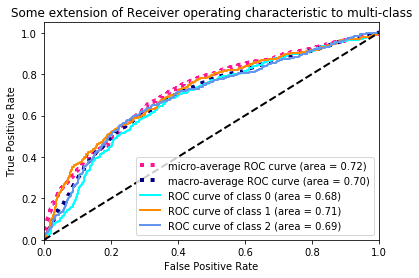

In [88]:
#Compute macro-average ROC curve and ROC area

# Primero agregamos la tasa de todos los falsos positivos
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#despues interpolamos todas las curvas ROC en este punto
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finalmente lo promediamos y computamos AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extensión Curva ROC multi-class SVC_tsne')
plt.legend(loc="lower right")
plt.show()

### Modelo Arbol de dimensiones reducidas 

In [108]:
Epsilon = 0.2 #error real
delta = 0.1  #error de entrenamiento
max_attributes=len(list(df1))
k=4
step=10

def m_opt_tree(k,delta,Epsilon,max_attributes):
            return int((np.log(2)/(2*Epsilon**2))*(((2**k)-1)*(1+np.log2(max_attributes-1))+1+np.log(1/delta)))
    
n_opt=(m_opt_tree(k,delta,Epsilon,max_attributes))
n_opt
N=range(n,round(len(X)*0.6),step) 
N

range(946, 2445, 10)

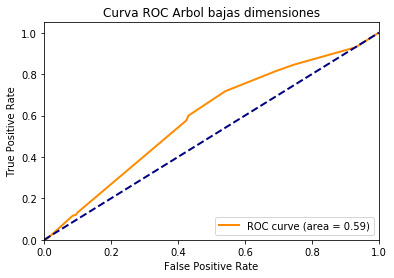

In [120]:
Tree_9 =OneVsRestClassifier( DecisionTreeClassifier(max_depth = 4,min_samples_leaf= 7, random_state=19))
for i in range(len(N)):
    X1_tr, X1_ts, Y1_tr, Y1_ts = train_test_split(X_train, y_train,train_size=N[i]/X.shape[0],random_state=19)  
                                            
    Y_Score=Tree_9.fit(X1_tr, Y1_tr).predict_proba(X_test)
    y_pred = Tree_9.predict(X_test)
    Y_proba = Tree_9.predict_proba(X_test)
    
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Y_Score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])   

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), Y_Score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Arbol bajas dimensiones')
plt.legend(loc="lower right")
plt.show()

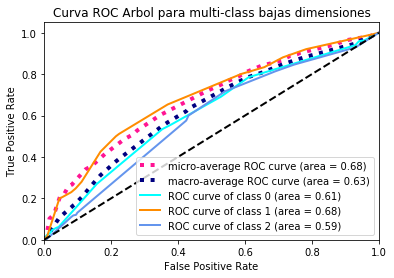

In [121]:
from scipy import interp
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['micro']),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr['macro'], tpr['macro'],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['macro']),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Arbol para multi-class bajas dimensiones')
plt.legend(loc="lower right")
plt.show()

### Regresion logística en bajas dimensiones

In [125]:
LR_m =OneVsRestClassifier( LogisticRegression(multi_class="multinomial",solver ="newton-cg"))
for i in range(len(N)):
    X1_tr, X1_ts, Y1_tr, Y1_ts = train_test_split(X_train, y_train,train_size=N[i]/X.shape[0],random_state=19)  
                                            
    Y_Score=LR_m.fit(X1_tr, Y1_tr).predict_proba(X_test)
    y_pred = LR_m.predict(X_test)
    Y_proba = LR_m.predict_proba(X_test)


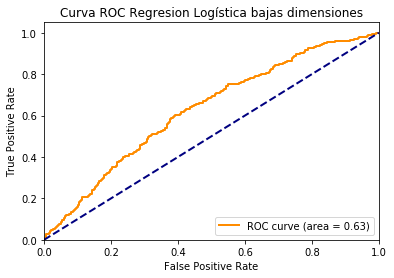

In [128]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Y_Score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])   

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), Y_Score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Regresion Logística bajas dimensiones')
plt.legend(loc="lower right")
plt.show()

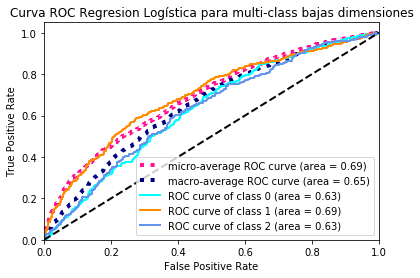

In [129]:
from scipy import interp
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['micro']),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr['macro'], tpr['macro'],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['macro']),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Regresion Logística para multi-class bajas dimensiones')
plt.legend(loc="lower right")
plt.show()

### Random Forest en bajas dimensiones

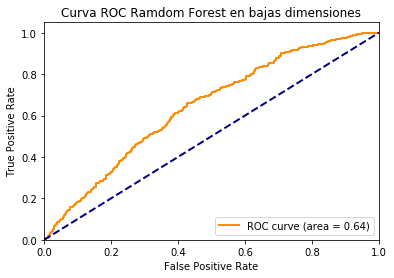

In [131]:
RFC_9 =OneVsRestClassifier(RandomForestClassifier(n_estimators=50, max_depth=3,random_state=0))
for i in range(len(N)):
    X1_tr, X1_ts, Y1_tr, Y1_ts = train_test_split(X_train, y_train,train_size=N[i]/X.shape[0],random_state=19)  
                                            
    Y_Score=RFC_9 .fit(X1_tr, Y1_tr).predict_proba(X_test)
    y_pred = RFC_9 .predict(X_test)
    Y_proba = RFC_9 .predict_proba(X_test)
    
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Y_Score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])   

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), Y_Score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Ramdom Forest en bajas dimensiones')
plt.legend(loc="lower right")
plt.show()

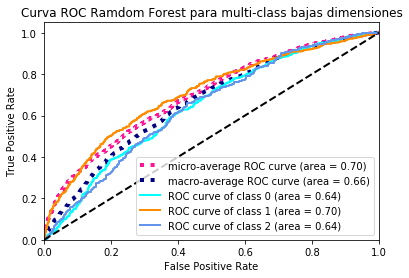

In [132]:
from scipy import interp
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['micro']),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr['macro'], tpr['macro'],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['macro']),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Ramdom Forest para multi-class bajas dimensiones')
plt.legend(loc="lower right")
plt.show()